In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('LIWC-22 Results - Text Analysis Database for LIW___ - LIWC Analysis.csv')

In [35]:
df

,group,response_writer,prompt,link,ColumnID,Text,Segment,WC,Analytic,Clout,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,Cheat,gpt,I cheated on my ex and I feel terrible. I betr...,https://www.reddit.com/r/BreakUps/comments/11j...,response,Thank you for sharing this—it takes a lot of c...,1,158,3.87,98.28,...,0.00,0,18.99,6.96,6.33,0.00,0,5.70,0.00,0.00
1,Cheat,gpt,I (M35) recently cheated on my partner (F30) o...,https://www.reddit.com/r/BreakUps/comments/1gj...,response,Thank you for opening up—this kind of honesty ...,1,172,3.73,93.30,...,0.00,0,22.09,6.98,8.72,0.00,0,6.40,0.00,0.00
2,Cheat,gpt,I know cheating isn't a topic we should tolera...,https://www.reddit.com/r/BreakUps/comments/1d4...,response,What you're feeling isn’t overthinking—it’s a ...,1,167,5.45,98.48,...,0.00,0,21.56,6.59,4.19,0.00,0,8.38,2.40,0.00
3,Cheat,gpt,Me (25) and My ex gf (25) been together for 4 ...,https://www.reddit.com/r/BreakUps/comments/1jl...,response,Thank you for sharing something so vulnerable....,1,162,19.76,72.07,...,0.00,0,20.37,6.79,8.64,0.00,0,4.94,0.00,0.00
4,Cheat,gpt,Feel free to give positive or negative comment...,https://www.reddit.com/r/cheating_stories/comm...,response,Thank you for sharing your story with so much ...,1,161,7.00,99.00,...,0.00,0,26.09,8.07,9.94,0.00,0,6.21,1.86,0.00
5,Cheat,gpt,Four years ago I made a mistake my cheating on...,https://www.reddit.com/r/relationships/comment...,response,Thank you for being so open about something so...,1,192,6.59,99.00,...,0.00,0,19.27,5.21,6.77,0.00,0,5.21,2.08,0.00
6,Cheat,gpt,I cheated on my wife last night. don't know wh...,https://www.reddit.com/r/TrueOffMyChest/commen...,response,Thank you for opening up in such a raw and pai...,1,191,10.67,97.44,...,0.00,0,19.90,5.76,7.33,0.00,0,6.81,0.00,0.00
7,Cheat,gpt,So me (31f) and my husband (32m) have been mar...,https://www.reddit.com/r/TrueOffMyChest/commen...,response,I'm really sorry you're going through this. Th...,1,202,3.16,97.60,...,0.00,0,23.76,7.43,8.42,0.00,0,6.93,0.99,0.00
8,Cheat,gpt,It's simple. I cheated and I was in the wrong....,https://www.reddit.com/r/relationship_advice/c...,response,"Thank you for sharing your story—it’s layered,...",1,166,18.65,95.08,...,0.00,0,21.69,6.63,8.43,0.00,0,5.42,1.20,0.00
9,Cheat,gpt,My adventure started out so innocently. I've a...,https://www.reddit.com/r/relationship_advice/c...,response,Thank you for sharing your story so openly—it ...,1,196,13.48,98.85,...,0.00,0,17.86,6.12,4.59,0.51,0,5.61,1.02,0.00


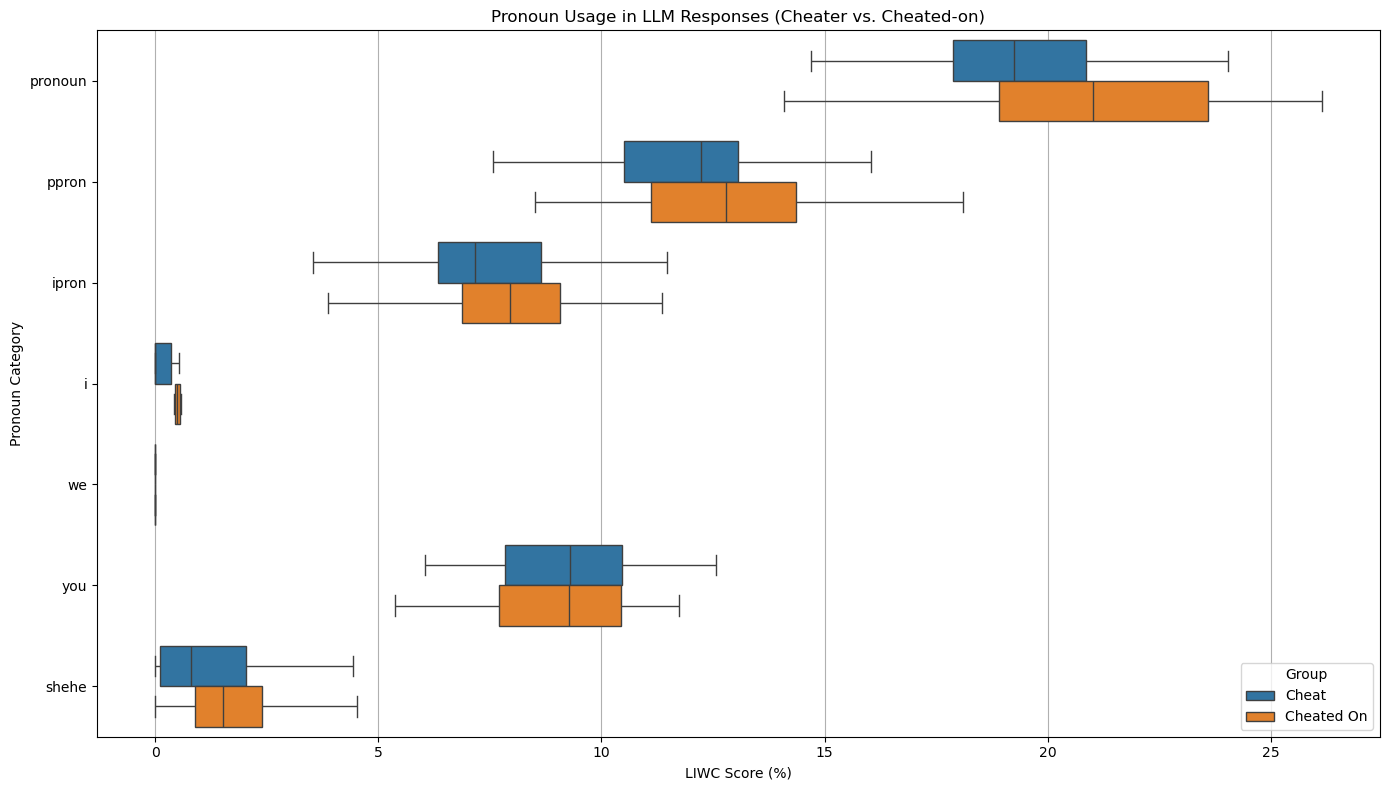

In [17]:
# Define pronoun columns
pronoun_cols = ['pronoun', 'ppron', 'ipron', 'i', 'we', 'you', 'shehe']

# Reshape for plotting
df_pronouns_long = df.melt(
    id_vars=['group', 'response_writer'],
    value_vars=pronoun_cols,
    var_name='PronounType',
    value_name='LIWC_Score'
)

# Plot: Boxplot of pronoun use by group
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_pronouns_long,
    x='LIWC_Score',
    y='PronounType',
    hue='group',
    showfliers=False
)
plt.title("Pronoun Usage in LLM Responses (Cheater vs. Cheated-on)")
plt.xlabel("LIWC Score (%)")
plt.ylabel("Pronoun Category")
plt.legend(title='Group')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

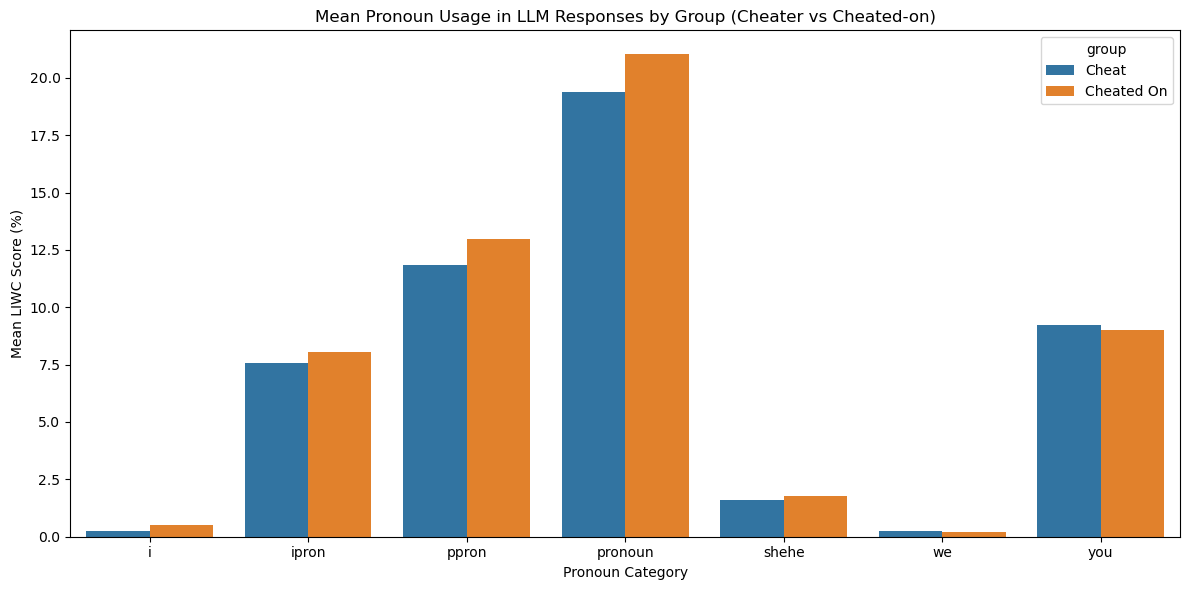

In [19]:
pronoun_cols = ['pronoun', 'ppron', 'ipron', 'i', 'we', 'you', 'shehe']

# Melt the dataframe to long format
df_pronouns_long = df.melt(
    id_vars=['group'],
    value_vars=pronoun_cols,
    var_name='PronounType',
    value_name='LIWC_Score'
)

# Group by and calculate mean
group_means = df_pronouns_long.groupby(['group', 'PronounType'])['LIWC_Score'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_means,
    x='PronounType',
    y='LIWC_Score',
    hue='group'
)
plt.title("Mean Pronoun Usage in LLM Responses by Group (Cheater vs Cheated-on)")
plt.ylabel("Mean LIWC Score (%)")
plt.xlabel("Pronoun Category")
plt.tight_layout()
plt.show()

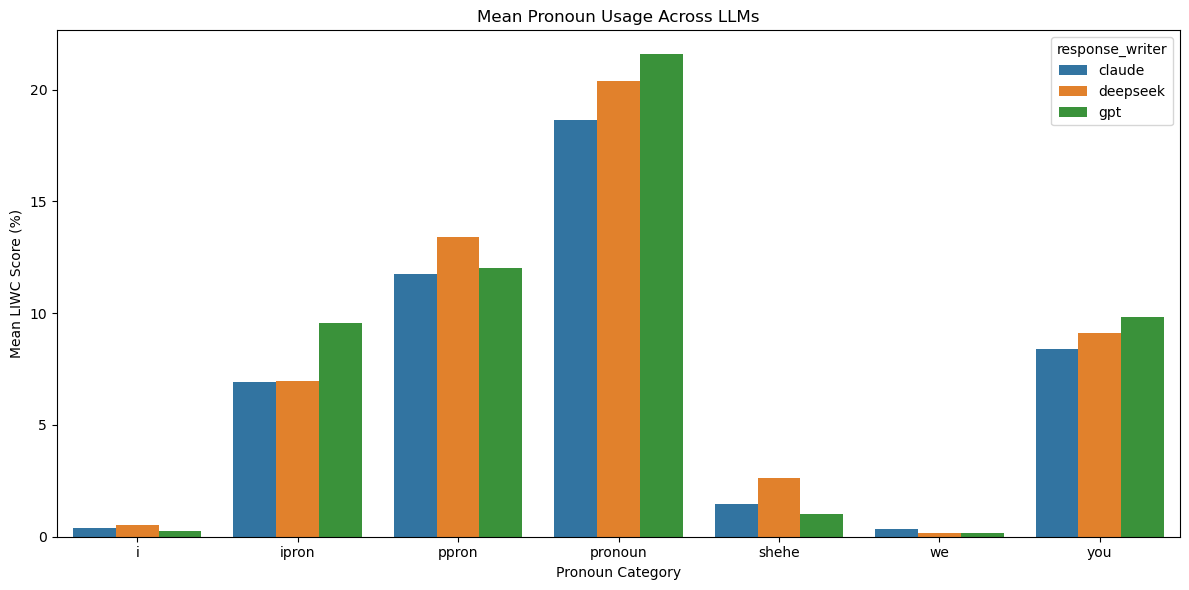

In [21]:
# Step 2: Reshape the data to long format for plotting
df_pronouns_long = df.melt(
    id_vars=['response_writer'],
    value_vars=pronoun_cols,
    var_name='PronounType',
    value_name='LIWC_Score'
)

# Step 3: Group by LLM (response_writer) and pronoun type, then take the mean
group_means = df_pronouns_long.groupby(['response_writer', 'PronounType'])['LIWC_Score'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_means,
    x='PronounType',
    y='LIWC_Score',
    hue='response_writer'
)
plt.title("Mean Pronoun Usage Across LLMs")
plt.xlabel("Pronoun Category")
plt.ylabel("Mean LIWC Score (%)")
plt.tight_layout()
plt.show()

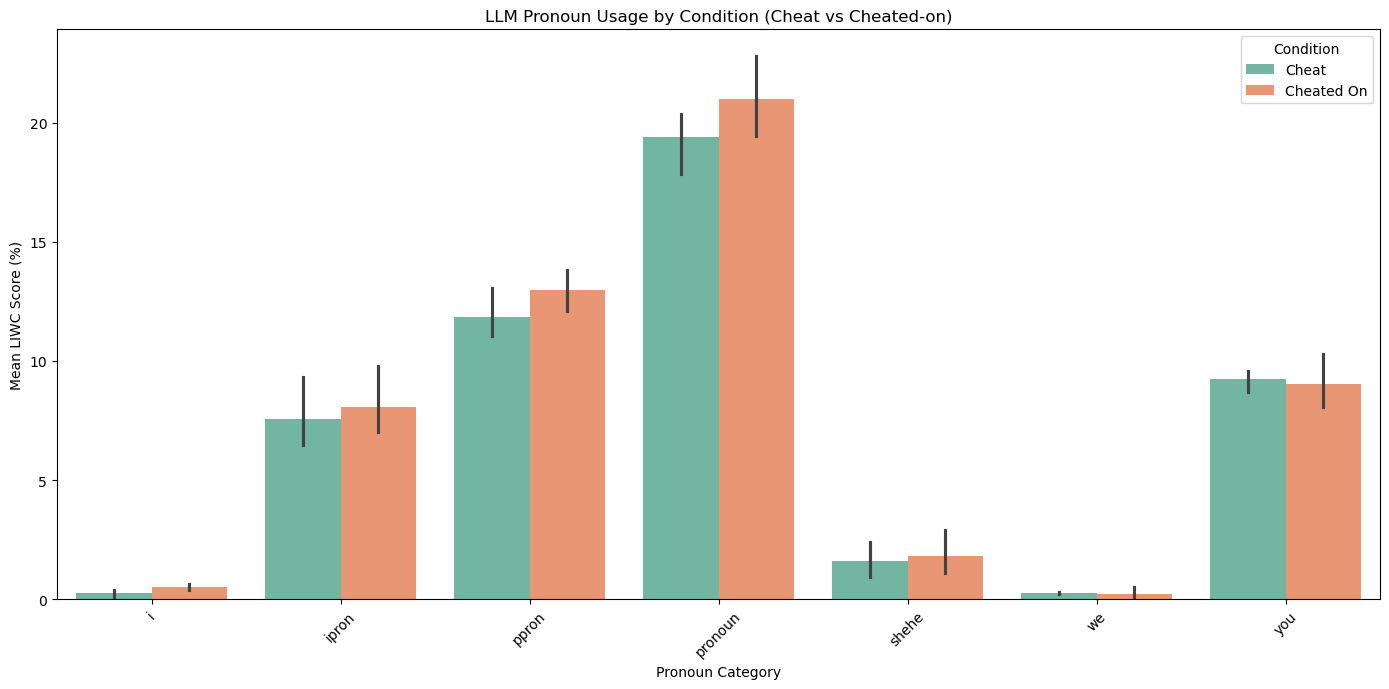

In [27]:
# Reshape the data
df_long = df.melt(
    id_vars=['group', 'response_writer'],
    value_vars=pronoun_cols,
    var_name='PronounType',
    value_name='LIWC_Score'
)

# Group by LLM + group + pronoun type, then calculate mean
grouped = df_long.groupby(['response_writer', 'group', 'PronounType'])['LIWC_Score'].mean().reset_index()

# Plot: Grouped bar plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=grouped,
    x='PronounType',
    y='LIWC_Score',
    hue='group',
    palette='Set2',
    dodge=True
)
plt.title("LLM Pronoun Usage by Condition (Cheat vs Cheated-on)")
plt.xlabel("Pronoun Category")
plt.ylabel("Mean LIWC Score (%)")
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/3t/hss0192x07q0dt3l_tycrq180000gn/T/ipykernel_59831/245152367.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


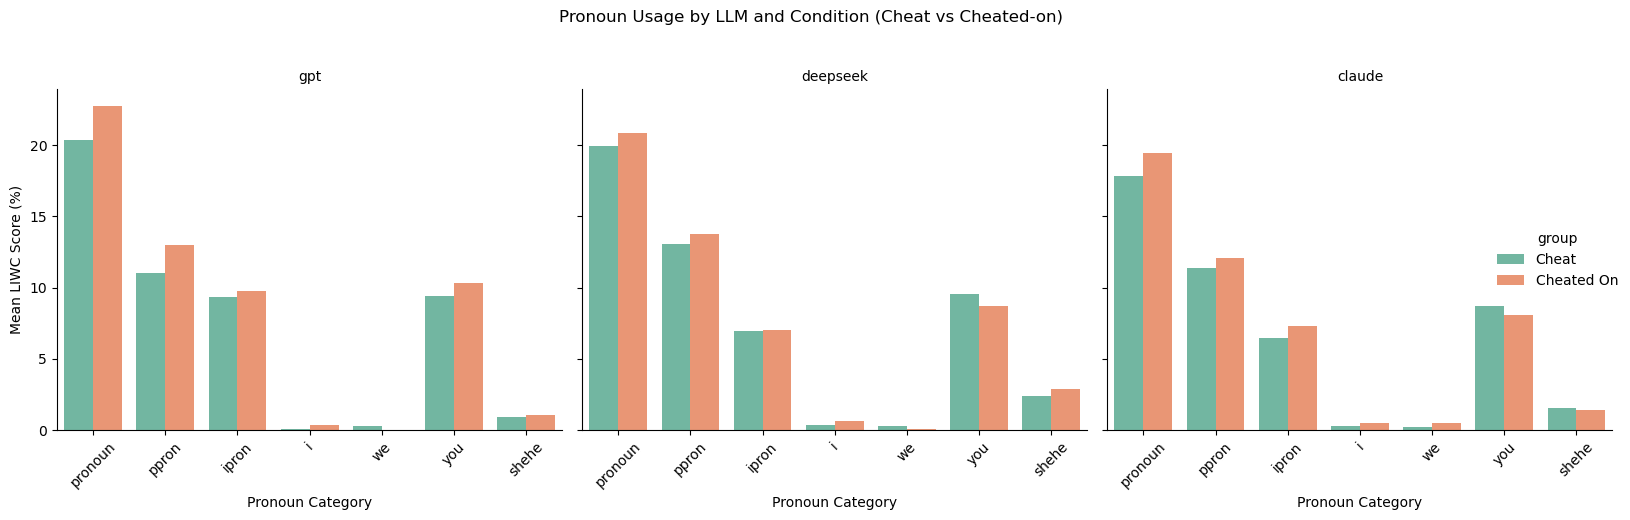

In [29]:
# Reshape to long format
df_long = df.melt(
    id_vars=['group', 'response_writer'],
    value_vars=pronoun_cols,
    var_name='FunctionWord',
    value_name='LIWC_Score'
)

# Create a FacetGrid bar plot: 1 subplot per LLM
g = sns.catplot(
    data=df_long,
    kind="bar",
    x="FunctionWord",
    y="LIWC_Score",
    hue="group",
    col="response_writer",
    ci=None,
    palette="Set2",
    height=5,
    aspect=1,
    sharey=True
)

# Format the plot
g.set_axis_labels("Pronoun Category", "Mean LIWC Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Pronoun Usage by LLM and Condition (Cheat vs Cheated-on)", y=1.03)
plt.tight_layout()
plt.show()

In [53]:
############### chatgpt uses more "you" (significant), esp for cheated on (diff in conditions not significant)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 2: Prepare the data (keep only necessary columns)
df_you = df[['you', 'group', 'response_writer']].dropna()

# Step 3: Run a two-way ANOVA
model = ols('you ~ C(group) * C(response_writer)', data=df_you).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 4: Display the result
print(anova_table)

                                 sum_sq    df         F    PR(>F)
C(group)                       0.644807   1.0  0.233741  0.630719
C(response_writer)            21.086453   2.0  3.821889  0.028030
C(group):C(response_writer)    9.651573   2.0  1.749334  0.183599
Residual                     148.966700  54.0       NaN       NaN


In [57]:
################## deepseek uses more shehe? reframe pain by referencing the other more when supporting victims
################## suggests externalization of blame 


# Subset for relevant columns
df_shehe = df[['shehe', 'group', 'response_writer']].dropna()

# Run two-way ANOVA
model_shehe = ols('shehe ~ C(group) * C(response_writer)', data=df_shehe).fit()
anova_shehe = sm.stats.anova_lm(model_shehe, typ=2)

# Show results
print(anova_shehe)

                                 sum_sq    df         F    PR(>F)
C(group)                       0.526407   1.0  0.182331  0.671076
C(response_writer)            28.893430   2.0  5.003888  0.010147
C(group):C(response_writer)    1.195243   2.0  0.206997  0.813664
Residual                     155.903280  54.0       NaN       NaN


In [55]:
############# 3 independent Welch’s t-test for each LLM, gpt has a significant difference in its use of 
############# personal pronouns across the 2 conditions. 

from scipy.stats import ttest_ind

# Filter data for each model
for model in ['gpt', 'claude', 'deepseek']:
    df_model = df[df['response_writer'] == model]
    
    cheat = df_model[df_model['group'] == 'Cheat']['ppron'].dropna()
    cheated = df_model[df_model['group'] == 'Cheated On']['ppron'].dropna()
    
    t_stat, p_val = ttest_ind(cheat, cheated, equal_var=False)  # Welch’s t-test
    
    print(f"\nT-test for {model}:")
    print(f"T-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")


T-test for gpt:
T-statistic = -2.5955, p-value = 0.0183

T-test for claude:
T-statistic = -0.7418, p-value = 0.4678

T-test for deepseek:
T-statistic = -0.6744, p-value = 0.5118


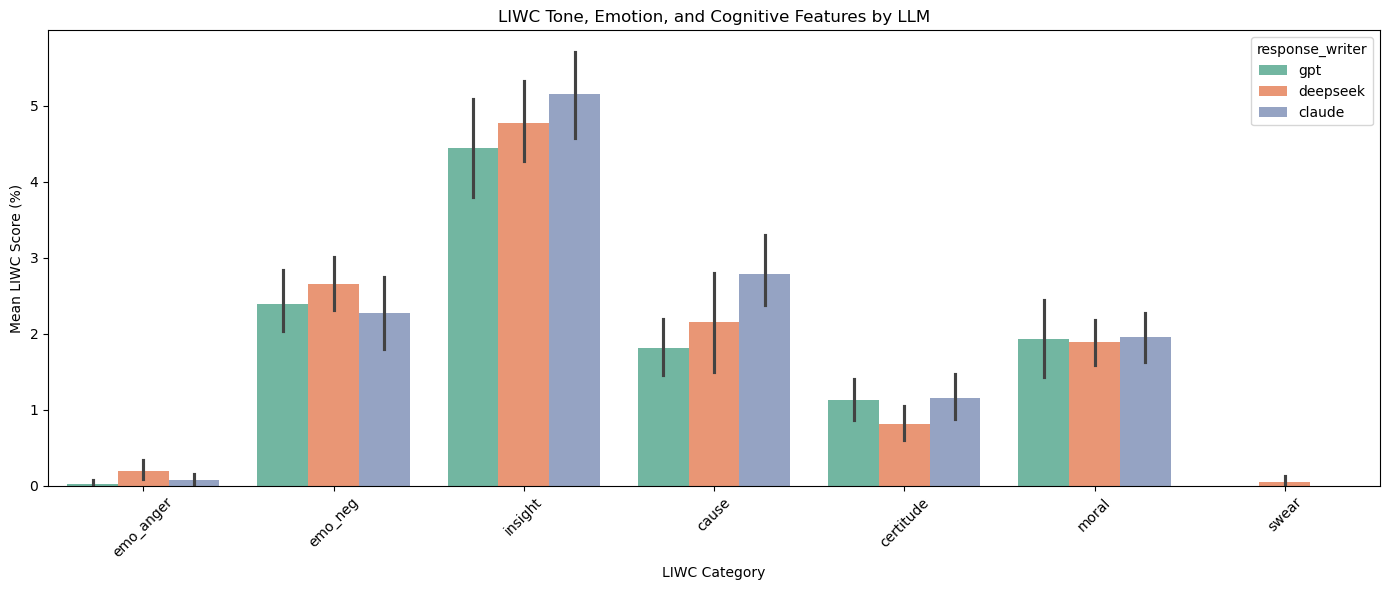

In [61]:
# Define selected emotional + cognitive categories
selected_liwc_vars = [
    'emo_anger', 'emo_neg', 
    'insight', 'cause', 'certitude',
    'moral', 'swear'
]

# Reshape for plotting
df_selected = df.melt(
    id_vars='response_writer',
    value_vars=selected_liwc_vars,
    var_name='LIWC_Category',
    value_name='Score'
)

# Grouped barplot: Mean score by LLM and category
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_selected,
    x='LIWC_Category',
    y='Score',
    hue='response_writer',
    palette='Set2'
)
plt.title("LIWC Tone, Emotion, and Cognitive Features by LLM")
plt.ylabel("Mean LIWC Score (%)")
plt.xlabel("LIWC Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/3t/hss0192x07q0dt3l_tycrq180000gn/T/ipykernel_59831/2737129851.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


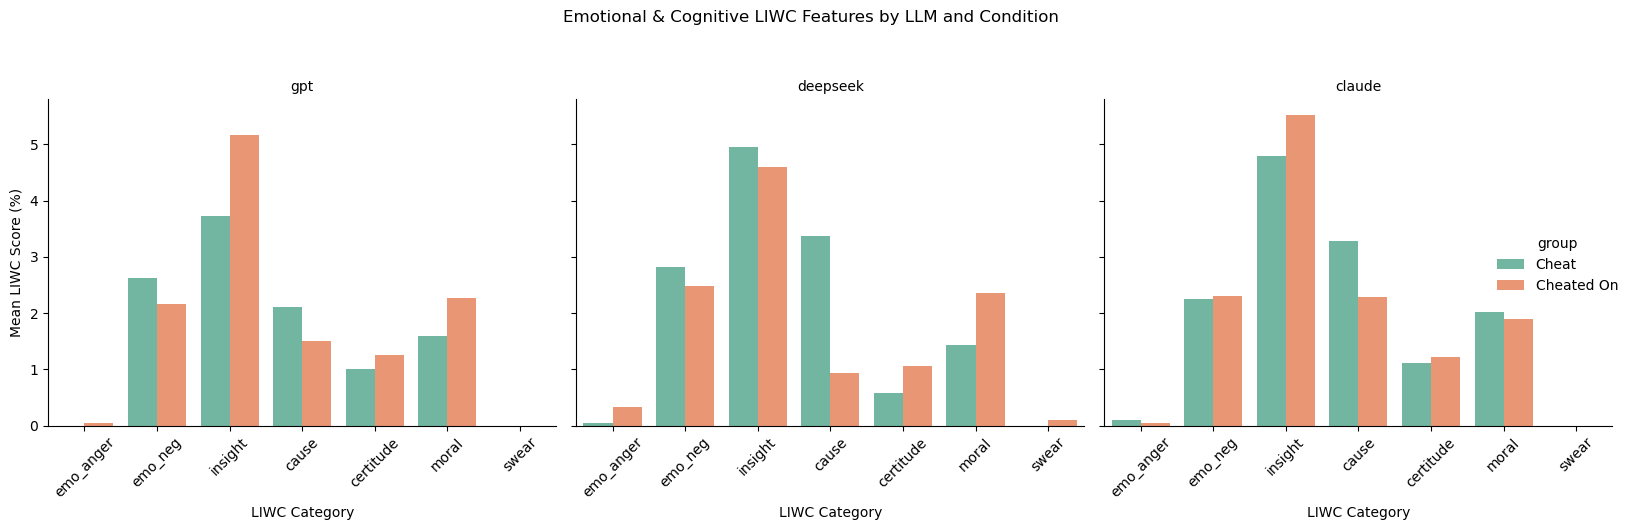

In [63]:
selected_liwc_vars = [
    'emo_anger', 'emo_neg', 
    'insight', 'cause', 'certitude',
    'moral', 'swear'
]

# Reshape data to long format
df_selected = df.melt(
    id_vars=['response_writer', 'group'],
    value_vars=selected_liwc_vars,
    var_name='LIWC_Category',
    value_name='Score'
)

# Create faceted barplot: one panel per LLM
g = sns.catplot(
    data=df_selected,
    kind="bar",
    x="LIWC_Category",
    y="Score",
    hue="group",
    col="response_writer",
    palette="Set2",
    ci=None,
    height=5,
    aspect=1
)

# Customize plot appearance
g.set_axis_labels("LIWC Category", "Mean LIWC Score (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Emotional & Cognitive LIWC Features by LLM and Condition", y=1.05)
plt.tight_layout()
plt.show()

In [65]:
liwc_vars = ["insight", "cause", "certitude", "moral"]

# Loop through each variable and run two-way ANOVA
for var in liwc_vars:
    print(f"\n--- 2-Way ANOVA for '{var}' ---")
    
    # Subset and drop missing
    df_var = df[['group', 'response_writer', var]].dropna()
    
    # Run ANOVA model
    model = ols(f"{var} ~ C(group) * C(response_writer)", data=df_var).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Display result
    print(anova_table)


--- 2-Way ANOVA for 'insight' ---
                                sum_sq    df         F    PR(>F)
C(group)                      5.502482   1.0  3.201038  0.079201
C(response_writer)            5.073343   2.0  1.475695  0.237692
C(group):C(response_writer)   8.099163   2.0  2.355821  0.104491
Residual                     92.824270  54.0       NaN       NaN

--- 2-Way ANOVA for 'cause' ---
                                sum_sq    df          F        PR(>F)
C(group)                     27.216135   1.0  33.266520  4.009452e-07
C(response_writer)            9.795503   2.0   5.986565  4.484564e-03
C(group):C(response_writer)   9.321130   2.0   5.696649  5.691593e-03
Residual                     44.178690  54.0        NaN           NaN

--- 2-Way ANOVA for 'certitude' ---
                                sum_sq    df         F    PR(>F)
C(group)                      1.139882   1.0  2.888215  0.094984
C(response_writer)            1.460410   2.0  1.850182  0.167036
C(group):C(response_write

In [ ]:
###### everything is significant for "cause"

###### for moral, the Cheater vs Cheated distinction does affect how much moral language (e.g., right, wrong, fair) is used.

In [79]:
#### Tukey HSD for "cause" Variable

from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_cause = df[['cause', 'group', 'response_writer']].dropna()

# 1. Tukey HSD for group (Cheat vs Cheated-on)
print("\nTukey HSD: Cause ~ Group")
tukey_group = pairwise_tukeyhsd(endog=df_cause['cause'], groups=df_cause['group'], alpha=0.05)
print(tukey_group.summary())

# 2. Tukey HSD for LLM (response_writer)
print("\nTukey HSD: Cause ~ LLM (Model)")
tukey_model = pairwise_tukeyhsd(endog=df_cause['cause'], groups=df_cause['response_writer'], alpha=0.05)
print(tukey_model.summary())

# 3. Tukey HSD for interaction: group × model
# Create combined group
df_cause['condition'] = df_cause['group'] + "_" + df_cause['response_writer']

print("\nTukey HSD: Cause ~ Group × Model Interaction")
tukey_interaction = pairwise_tukeyhsd(endog=df_cause['cause'], groups=df_cause['condition'], alpha=0.05)
print(tukey_interaction.summary())


Tukey HSD: Cause ~ Group
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj  lower   upper  reject
-------------------------------------------------------
 Cheat Cheated On   -1.347   0.0 -1.8869 -0.8071   True
-------------------------------------------------------

Tukey HSD: Cause ~ LLM (Model)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
  claude deepseek   -0.637 0.2167 -1.5426  0.2686  False
  claude      gpt  -0.9745 0.0322 -1.8801 -0.0689   True
deepseek      gpt  -0.3375 0.6445 -1.2431  0.5681  False
--------------------------------------------------------

Tukey HSD: Cause ~ Group × Model Interaction
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
-----------------------------------------------------------

# Insight on the "Cause" var

–1.35	< 0.001	✅ Yes: Cheated-on users receive significantly more causal language.

Psych insight: LLMs may be trying to help victims make sense of betrayal (e.g., "because they were emotionally distant"), offering rationalization or narrative coherence.

---
Claude vs GPT	–0.97	0.032	✅ Yes: GPT uses significantly more causal language than Claude.

GPT might adopt a more explanatory, therapist-like tone, while Claude is more neutral or reserved in rationalizing events.

---

Cheat_DeepSeek vs Cheated-DeepSeek	–2.44	<0.001	✅:	DeepSeek shifts dramatically: says way more "because/since" things to Cheated-On.

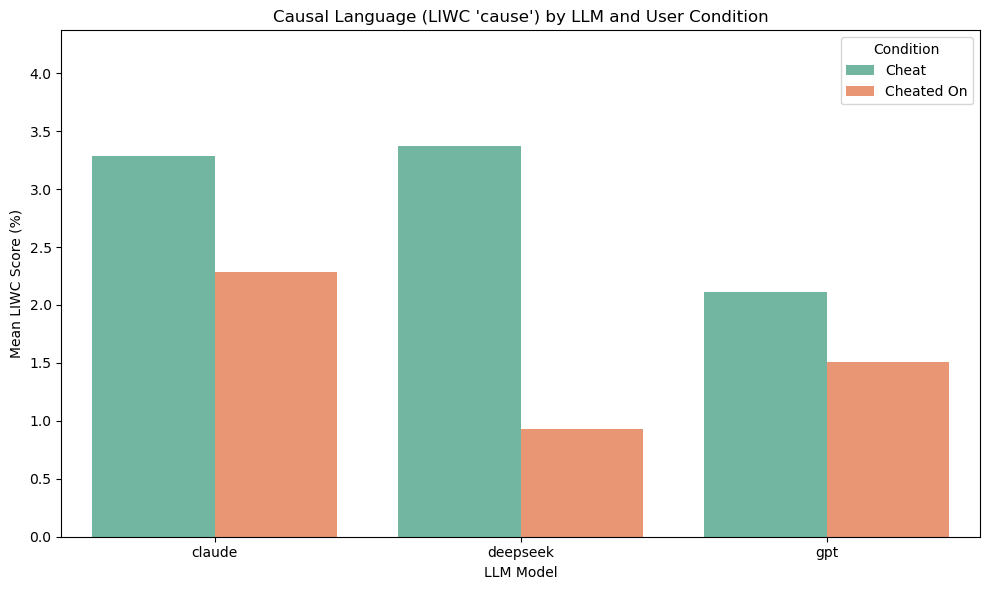

In [92]:
df_plot = df[['group', 'response_writer', 'cause']].dropna()

# Calculate group means for each LLM × Condition
grouped_means = df_plot.groupby(['response_writer', 'group'])['cause'].mean().reset_index()

# Plot grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_means,
    x='response_writer',
    y='cause',
    hue='group',
    palette='Set2'
)

# Style
plt.title("Causal Language (LIWC 'cause') by LLM and User Condition")
plt.ylabel("Mean LIWC Score (%)")
plt.xlabel("LLM Model")
plt.ylim(0, grouped_means['cause'].max() + 1)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

---

---

In [89]:
###### tucky test for "moral" var:
## LLMs consistently use more moralizing language depending on who the user is, regardless of which model it is.
## So we wanna know: Which group gets more moral words? Are certain LLMs (e.g., GPT) slightly more judgmental or soft?

df_moral = df[['moral', 'group', 'response_writer']].dropna()

# Combined group × model for interaction analysis
df_moral['condition'] = df_moral['group'] + "_" + df_moral['response_writer']

# Tukey HSD - group level
print("Tukey HSD for moral ~ group")
tukey_group = pairwise_tukeyhsd(df_moral['moral'], df_moral['group'])
print(tukey_group.summary())

# Tukey HSD - group × model interaction
print("\nTukey HSD for moral ~ group × model")
tukey_interaction = pairwise_tukeyhsd(df_moral['moral'], df_moral['condition'])
print(tukey_interaction.summary())

Tukey HSD for moral ~ group
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj  lower  upper  reject
------------------------------------------------------
 Cheat Cheated On    0.488 0.0346 0.0365 0.9395   True
------------------------------------------------------

Tukey HSD for moral ~ group × model
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
       Cheat_claude      Cheat_deepseek     -0.6 0.6422 -1.7531 0.5531  False
       Cheat_claude           Cheat_gpt    -0.43 0.8785 -1.5831 0.7231  False
       Cheat_claude   Cheated On_claude   -0.135 0.9993 -1.2881 1.0181  False
       Cheat_claude Cheated On_deepseek    0.329 0.9579 -0.8241 1.4821  False
       Cheat_claude      Cheated On_gpt     0.24 0.9895 -0.9131 1.3931  False
     Cheat_deepseek           Cheat_

# Insight on the "Moral" var:

Cheated-On	+0.488	0.035	✅ Yes:	Responses to cheated-on users include significantly more moral language than those to cheaters.

None of the model-specific pairwise comparisons were statistically significant

Even though the differences aren't statistically significant, the trend across models is consistent:

- LLMs restrain moral judgment when addressing cheaters (possibly to avoid offense or maintain neutrality)

- But lean into moral validation with those who have been betrayed.

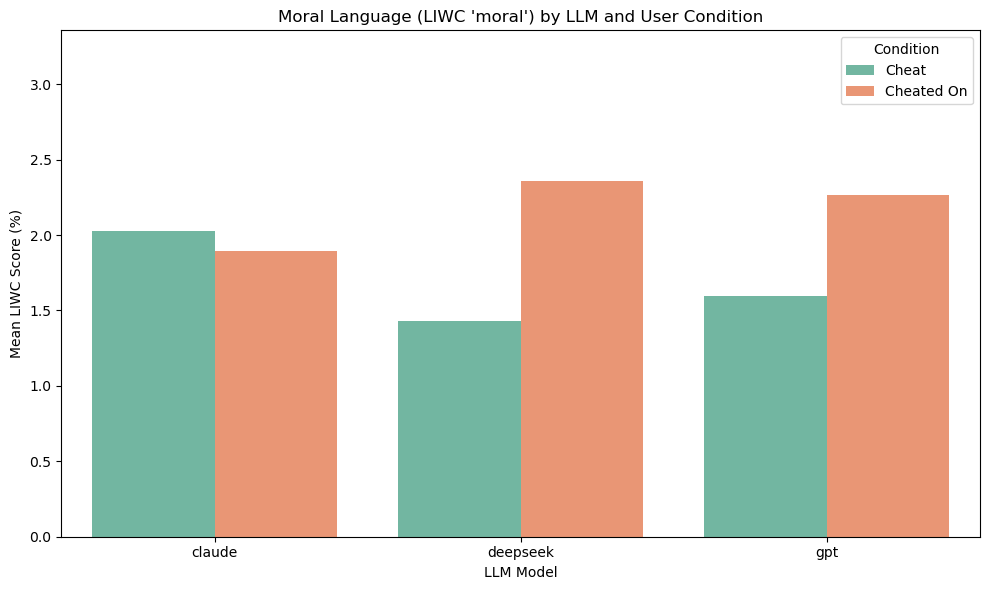

In [94]:
df_moral = df[['group', 'response_writer', 'moral']].dropna()

# Group means for each LLM × Condition
moral_means = df_moral.groupby(['response_writer', 'group'])['moral'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=moral_means,
    x='response_writer',
    y='moral',
    hue='group',
    palette='Set2'
)

# Style
plt.title("Moral Language (LIWC 'moral') by LLM and User Condition")
plt.ylabel("Mean LIWC Score (%)")
plt.xlabel("LLM Model")
plt.ylim(0, moral_means['moral'].max() + 1)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

---

# N-grams

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
## trigram

# Load data
df = pd.read_csv("LIWC-22 Results - Text Analysis Database for LIW___ - LIWC Analysis.csv")
df = df[['Text', 'group', 'response_writer']].dropna()

# Set up for trigrams only
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')

# Loop through LLMs and groups
models = df['response_writer'].unique()
groups = df['group'].unique()

for model in models:
    for group in groups:
        print(f"\n🔹 Top Trigrams for {model.upper()} – {group}")

        subset = df[(df['response_writer'] == model) & (df['group'] == group)]
        if subset.empty:
            print("No data for this combination.")
            continue

        X = vectorizer.fit_transform(subset['Text'])

        trigram_freq = pd.DataFrame(
            X.toarray(),
            columns=vectorizer.get_feature_names_out()
        ).sum().sort_values(ascending=False)

        print(trigram_freq.head(15))


🔹 Top Trigrams for GPT – Cheat
thank sharing story                  3
doesn excuse happened                2
takes lot courage                    2
make things right                    2
possible relationship doesn          1
place emotional exhaustion           1
place genuine remorse                1
place hear incredibly                1
point matter happens                 1
point understanding fully            1
possible cares deserves              1
possible day ready                   1
powerful desire grow                 1
physically emotionally recovering    1
powerful step reconciliation         1
dtype: int64

🔹 Top Trigrams for GPT – Cheated On
feeling completely valid          3
really sorry going                3
especially comes ve               2
don need answers                  2
wasn just betrayal                2
betrayal feeling completely       2
happened wasn just                2
open clearly tearing              1
open heart weakness               1
past hurt

In [110]:
#### trigram for each model, regardless of condition
df = df[['Text', 'response_writer']].dropna()

# Set up vectorizer for trigrams only
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')

# Loop through each model only
models = df['response_writer'].unique()

for model in models:
    print(f"\n🔹 Top Trigrams for {model.upper()} (All Conditions Combined)")

    # Filter responses for this model
    subset = df[df['response_writer'] == model]

    # Fit and transform
    X = vectorizer.fit_transform(subset['Text'])

    # Sum trigram frequencies
    trigram_freq = pd.DataFrame(
        X.toarray(),
        columns=vectorizer.get_feature_names_out()
    ).sum().sort_values(ascending=False)

    # Show top 15 trigrams
    print(trigram_freq.head(15))


🔹 Top Trigrams for GPT (All Conditions Combined)
really sorry going             4
thank sharing story            3
feeling completely valid       3
make things right              2
especially comes ve            2
takes lot courage              2
makes complete sense           2
sorry going pain               2
doesn excuse happened          2
wasn just betrayal             2
betrayal feeling completely    2
don need answers               2
happened wasn just             2
remorse matters healing        1
people remind worth            1
dtype: int64

🔹 Top Trigrams for DEEPSEEK (All Conditions Combined)
lot self awareness             5
shows lot self                 5
post shows lot                 5
self awareness genuine         4
awareness genuine remorse      4
respect need space             3
relationship person thought    3
remorse important step         3
genuine remorse important      3
healing isn linear             3
want know feelings             2
chose betray right      

In [112]:
#### unigram for each model, regardless of condition
df = df[['Text', 'response_writer']].dropna()

# Set up CountVectorizer for unigrams only
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')

# Loop through each model
models = df['response_writer'].unique()

for model in models:
    print(f"\n🔹 Top Unigrams for {model.upper()} (All Conditions Combined)")

    # Filter for just this model
    subset = df[df['response_writer'] == model]

    # Fit and transform
    X = vectorizer.fit_transform(subset['Text'])

    # Sum unigram frequencies
    unigram_freq = pd.DataFrame(
        X.toarray(),
        columns=vectorizer.get_feature_names_out()
    ).sum().sort_values(ascending=False)

    # Show top 15 unigrams
    print(unigram_freq.head(15))


🔹 Top Unigrams for GPT (All Conditions Combined)
love          22
right         21
feel          21
time          20
pain          19
doesn         18
just          18
happened      16
trust         15
feeling       13
ve            12
thank         12
especially    12
healing       12
kind          12
dtype: int64

🔹 Top Unigrams for DEEPSEEK (All Conditions Combined)
feel          22
right         22
time          22
pain          21
deeply        18
love          18
betrayal      16
okay          16
don           14
especially    14
self          13
healing       13
therapy       13
deserve       13
like          13
dtype: int64

🔹 Top Unigrams for CLAUDE (All Conditions Combined)
relationship    29
make            22
betrayal        20
right           16
pain            15
experience      14
self            14
process         14
time            14
painful         13
like            13
difficult       12
feelings        12
sharing         12
years           12
dtype: int64


# *Bigram for each model, regardless of condition

In [121]:
#### bigram for each model, regardless of condition

df = df[['Text', 'response_writer']].dropna()

# Set up vectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Loop through each model
models = df['response_writer'].unique()

for model in models:
    print(f"\n🔹 Top 15 Bigrams for {model.upper()} (All Conditions Combined)")

    # Filter responses for this model
    subset = df[df['response_writer'] == model]

    # Fit and transform
    X = vectorizer.fit_transform(subset['Text'])

    # Sum and sort bigrams
    bigram_freq = pd.DataFrame(
        X.toarray(),
        columns=vectorizer.get_feature_names_out()
    ).sum().sort_values(ascending=False)

    # Display top 15
    print(bigram_freq.head(15))


🔹 Top 15 Bigrams for GPT (All Conditions Combined)
thank sharing         7
sorry going           5
completely valid      5
feel like             5
okay feel             4
isn just              4
really sorry          4
doesn mean            4
rebuilding trust      3
reflection worth      3
sharing story         3
incredibly painful    3
happened wasn         3
feeling completely    3
deep emotional        3
dtype: int64

🔹 Top 15 Bigrams for DEEPSEEK (All Conditions Combined)
post shows             7
lot self               5
genuine remorse        5
self awareness         5
shows lot              5
healing isn            5
okay grieve            5
awareness genuine      4
time process           4
sorry going            4
didn deserve           4
need space             3
person thought         3
loved deeply           3
relationship person    3
dtype: int64

🔹 Top 15 Bigrams for CLAUDE (All Conditions Combined)
double check                 9
make mistakes                9
retryclaude m